# FUNCTION to load the model from disk & predict

In [25]:
import pickle
import pandas as pd

def predict_new_data(new_lat,new_lon):
    try:
        filename = 'finalized_model_KNN.sav'
        loaded_model = pickle.load(open(filename, 'rb'))

        d = {'lat':new_lat , 'lon': new_lon}
        df_new = pd.DataFrame(data=d,index=[0])
        prediction=loaded_model.predict(df_new)
        return prediction[0]
    except:
        return 6

# Test function


In [20]:
import random as rnd

amount_sections=2
sections=range(amount_sections)

limit_upper_lat=[4.755422,4.678025]
limit_lower_lat=[4.663925,4.553890]
limit_upper_lon=[74.075022,74.135649]
limit_lower_lon=[74.047307,74.087928]

lat_list=[]
lon_list=[]
id_data=[]

for j in sections:
    for i in range (1000):
        lat =rnd.uniform(limit_lower_lat[j],limit_upper_lat[j])
        lon=-rnd.uniform(limit_lower_lon[j],limit_upper_lon[j])
        lat_list.append(lat)
        lon_list.append(lon)
        id_data.append(i)

d = {'id_data':id_data,'new_lat': lat_list, 'new_lon': lon_list}
df_new = pd.DataFrame(data=d)

df_new

,id_data,new_lat,new_lon
0,0,4.730636,-74.049475
1,1,4.689704,-74.074529
2,2,4.709563,-74.056981
3,3,4.696269,-74.069644
4,4,4.715685,-74.063167
...,...,...,...
1995,995,4.631128,-74.091128
1996,996,4.672018,-74.093058
1997,997,4.655603,-74.094859
1998,998,4.570895,-74.096603


In [23]:
df_new['cluster_predicted']= df_new.apply(lambda row: predict_new_data(row['new_lat'], row['new_lon']), axis=1)

In [24]:
df_new

,id_data,new_lat,new_lon,cluster_predicted
0,0,4.730636,-74.049475,2
1,1,4.689704,-74.074529,4
2,2,4.709563,-74.056981,4
3,3,4.696269,-74.069644,4
4,4,4.715685,-74.063167,2
...,...,...,...,...
1995,995,4.631128,-74.091128,1
1996,996,4.672018,-74.093058,0
1997,997,4.655603,-74.094859,0
1998,998,4.570895,-74.096603,3


<Axes: xlabel='new_lon', ylabel='new_lat'>

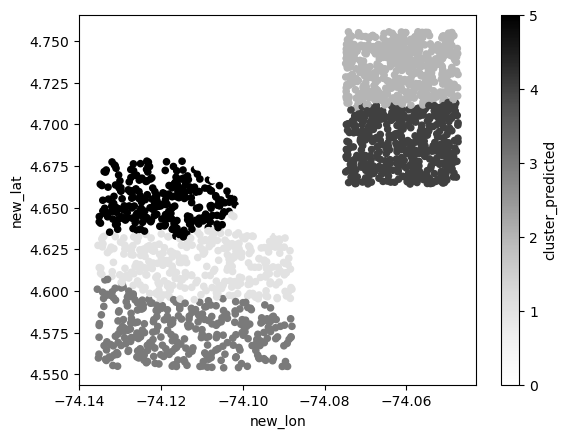

In [29]:
df_new.plot(x='new_lon',y='new_lat',kind='scatter',c='cluster_predicted')